## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [123]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [124]:
import pandas as pd

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train, y_train)
x_test = scaler.fit_transform(x_test, y_test)

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

model = Sequential()
# input layer
model.add(Dense(1, input_dim=13, activation='sigmoid'))
# hidden layet
model.add(Dense(1, activation="sigmoid"))
#output layer
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_squared_error', optimizer="adam")

In [127]:
history = model.fit(x_train, y_train, epochs=500, verbose=0)

In [128]:
scores = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 2ms/sample - loss: 178.5899


In [129]:
print(history.history.keys())

dict_keys(['loss'])


In [130]:
print(history.history['loss'][0:10])

[568.0981203589109, 566.8388671875, 565.5639346283261, 564.2612631014078, 562.9604105430075, 561.6459864248144, 560.3060610931699, 558.9781312848081, 557.632936383238, 556.2946535620359]


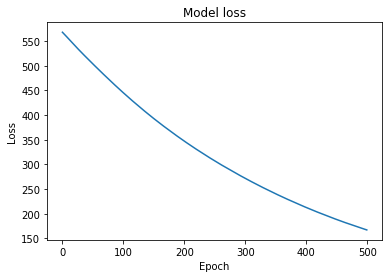

In [131]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

mean_squared_error(y_test, y_pred)

40.6014544667151

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [134]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [135]:
X_train.shape

(60000, 28, 28)

In [136]:
# reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [138]:
# set to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [141]:
# set outputs to categorical
import keras

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [142]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [143]:
mnist_model = Sequential()

# hidden layer
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
# output layer
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [146]:
history = mnist_model.fit(X_train, y_train, batch_size=32, epochs=150, verbose=1)

Epoch 1/150
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2820 - acc: 0.9189
Epoch 2/150
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2797 - acc: 0.9200
Epoch 3/150
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2832 - acc: 0.9186
Epoch 4/150
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2830 - acc: 0.9190
Epoch 5/150
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2841 - acc: 0.9187
Epoch 6/150
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2837 - acc: 0.9191
Epoch 7/150
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2811 - acc: 0.9204
Epoch 8/150
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2817 - acc: 0.9196
Epoch 9/150
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2837 - acc: 0.9198
Epoch 10/150
60000/60000 [==============================] - 3s 57us/sampl

In [147]:
score = mnist_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.5778 - acc: 0.8970


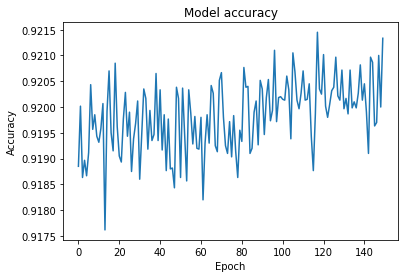

In [150]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.